# List for storing all unscaled results

In [ ]:
all_model_metrics = []

# Linear Regression Model for LAG 1 (Unscaled)

Using 1093 complete rows for the model.
Training data from 2022-01-01 to 2024-05-24 (874 rows)
Test data from 2024-05-25 to 2024-12-30 (219 rows)

--- Forecasting Model Evaluation Metrics ---
Mean Absolute Error (MAE): 8.2803
Mean Squared Error (MSE): 115.2840
Root Mean Squared Error (RMSE): 10.7370
R-squared (R2): 0.3314

--- Model Coefficients ---
Intercept: 20.4617
Coefficient for Daily_Mean_PM: 0.0639
Coefficient for Daily_AQI_Value: 0.5392

Model Formula:
Predicted AQI (Tomorrow) = 20.4617 + (0.0639 * Daily_Mean_PM) + (0.5392 * Daily_AQI_Value)

Plot of forecasting results saved to 'forecasting_model_results_v2.png'


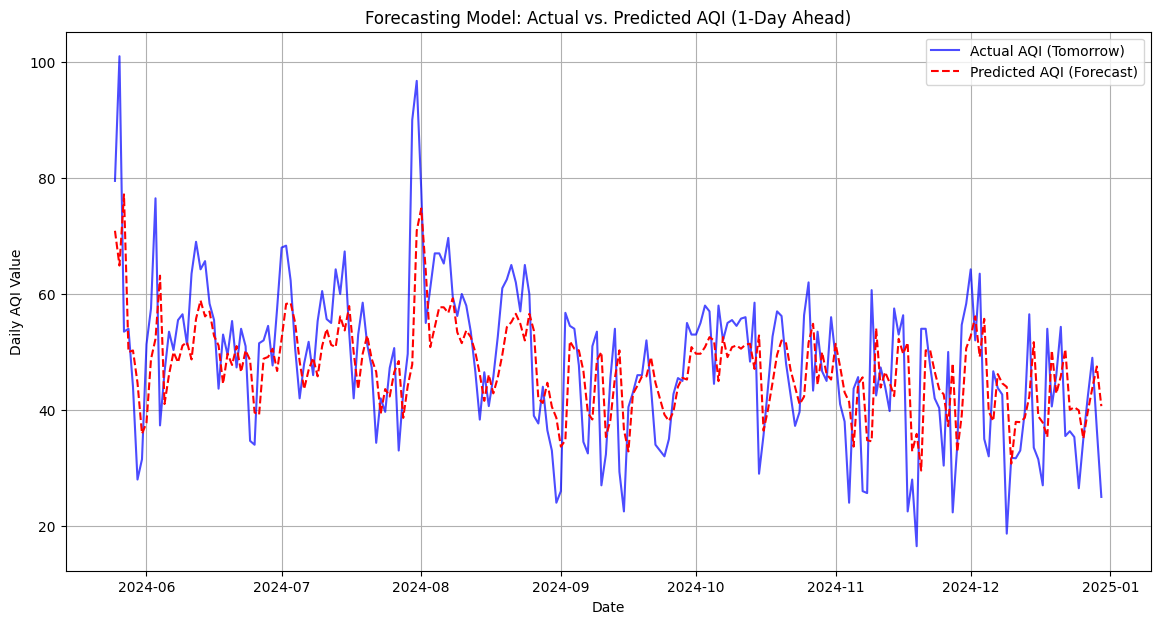

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load and Prepare Data ---

# Load the dataset
file_name = "LAG1_PM_Combined_AQI_2022_2024.csv"
df = pd.read_csv(file_name)

# Convert DATE to datetime and set as index for chronological splitting
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%y')
df = df.set_index('DATE').sort_index()

# --- 2. Define Features (X) and Target (y) ---

# Features (Today's data, t)
features = ['Daily_Mean_PM', 'Daily_AQI_Value']
# Target (Tomorrow's data, t+1, which is in this column)
target = 'AQI_Targeted_Value_LAG_1'

X = df[features]
y = df[target]

# Drop any rows where either features or target are missing
# This aligns X and y and removes potential NaNs (e.g., the last row if its target is missing)
combined_df = pd.concat([X, y], axis=1)
combined_df = combined_df.dropna()

X = combined_df[features]
y = combined_df[target]

print(f"Using {len(combined_df)} complete rows for the model.")

# --- 3. Chronological Train/Test Split ---

# We must split by date for a forecasting model. We CANNOT shuffle.
split_point = int(len(combined_df) * 0.8) # 80% train, 20% test

X_train = X.iloc[:split_point]
y_train = y.iloc[:split_point]

X_test = X.iloc[split_point:]
y_test = y.iloc[split_point:]

print(f"Training data from {X_train.index.min().date()} to {X_train.index.max().date()} ({len(X_train)} rows)")
print(f"Test data from {X_test.index.min().date()} to {X_test.index.max().date()} ({len(X_test)} rows)")

# --- 4. Build and Evaluate the Forecasting Model ---

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the forecast
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Forecasting Model Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# --- 5. Get Model Coefficients ---

intercept = model.intercept_
coefficients = model.coef_

print("\n--- Model Coefficients ---")
print(f"Intercept: {intercept:.4f}")
print(f"Coefficient for {features[0]}: {coefficients[0]:.4f}")
print(f"Coefficient for {features[1]}: {coefficients[1]:.4f}")

print("\nModel Formula:")
print(f"Predicted AQI (Tomorrow) = {intercept:.4f} + ({coefficients[0]:.4f} * Daily_Mean_PM) + ({coefficients[1]:.4f} * Daily_AQI_Value)")

# --- 6. Plot the results (Actual vs. Predicted) ---

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual AQI (Tomorrow)', color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred, label='Predicted AQI (Forecast)', color='red', linestyle='--')
plt.title('Forecasting Model: Actual vs. Predicted AQI (1-Day Ahead)')
plt.xlabel('Date')
plt.ylabel('Daily AQI Value')
plt.legend()
plt.grid(True)
# plt.savefig("forecasting_model_results_v2.png")

metrics_data = {
    'Model': ['LAG_1_Model'],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse],
    'R-squared': [r2]
}

# Append dictionary to the list
all_model_metrics.append(metrics_data)

print("\nPlot of forecasting results saved to 'forecasting_model_results_v2.png'")

# Linear Regression Model for LAG 7 (Unscaled)

Using 1087 complete rows for the model.
Training data from 2022-01-01 to 2024-05-19 (869 rows)
Test data from 2024-05-20 to 2024-12-24 (218 rows)

--- Forecasting Model Evaluation Metrics ---
Mean Absolute Error (MAE): 10.2013
Mean Squared Error (MSE): 172.6830
Root Mean Squared Error (RMSE): 13.1409
R-squared (R2): -0.0234

--- Model Coefficients ---
Intercept: 41.9491
Coefficient for Daily_Mean_PM: 0.3023
Coefficient for Daily_AQI_Value: 0.0209

Model Formula:
Predicted AQI (Tomorrow) = 41.9491 + (0.3023 * Daily_Mean_PM) + (0.0209 * Daily_AQI_Value)

Plot of forecasting results saved to 'forecasting_model_results_v2.png'


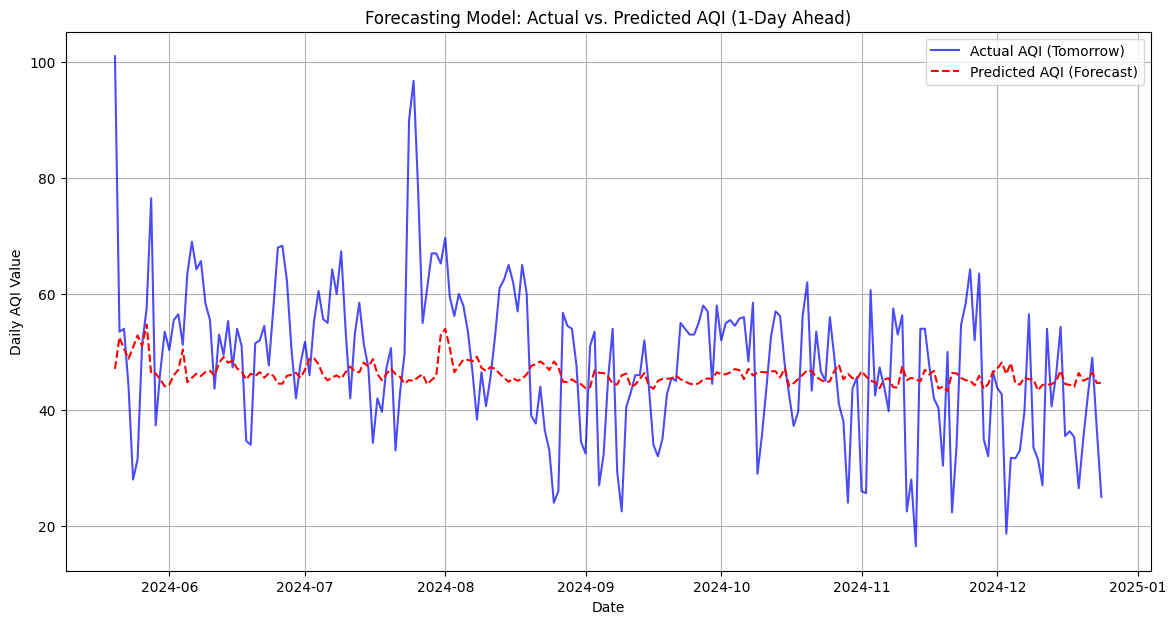

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load and Prepare Data ---

# Load the dataset
file_name = "LAG7_PM_Combined_AQI_2022_2024.csv"
df = pd.read_csv(file_name)

# Convert DATE to datetime and set as index for chronological splitting
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df = df.set_index('DATE').sort_index()

# --- 2. Define Features (X) and Target (y) ---

# Features (Today's data, t)
features = ['Daily_Mean_PM', 'Daily_AQI_Value']
# Target (Tomorrow's data, t+1, which is in this column)
target = 'AQI_Targeted_Value_LAG_7'

X = df[features]
y = df[target]

# Drop any rows where either features or target are missing
# This aligns X and y and removes potential NaNs (e.g., the last row if its target is missing)
combined_df = pd.concat([X, y], axis=1)
combined_df = combined_df.dropna()

X = combined_df[features]
y = combined_df[target]

print(f"Using {len(combined_df)} complete rows for the model.")

# --- 3. Chronological Train/Test Split ---

# We must split by date for a forecasting model. We CANNOT shuffle.
split_point = int(len(combined_df) * 0.8) # 80% train, 20% test

X_train = X.iloc[:split_point]
y_train = y.iloc[:split_point]

X_test = X.iloc[split_point:]
y_test = y.iloc[split_point:]

print(f"Training data from {X_train.index.min().date()} to {X_train.index.max().date()} ({len(X_train)} rows)")
print(f"Test data from {X_test.index.min().date()} to {X_test.index.max().date()} ({len(X_test)} rows)")

# --- 4. Build and Evaluate the Forecasting Model ---

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the forecast
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Forecasting Model Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# --- 5. Get Model Coefficients ---

intercept = model.intercept_
coefficients = model.coef_

print("\n--- Model Coefficients ---")
print(f"Intercept: {intercept:.4f}")
print(f"Coefficient for {features[0]}: {coefficients[0]:.4f}")
print(f"Coefficient for {features[1]}: {coefficients[1]:.4f}")

print("\nModel Formula:")
print(f"Predicted AQI (Tomorrow) = {intercept:.4f} + ({coefficients[0]:.4f} * Daily_Mean_PM) + ({coefficients[1]:.4f} * Daily_AQI_Value)")

# --- 6. Plot the results (Actual vs. Predicted) ---

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual AQI (Tomorrow)', color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred, label='Predicted AQI (Forecast)', color='red', linestyle='--')
plt.title('Forecasting Model: Actual vs. Predicted AQI (1-Day Ahead)')
plt.xlabel('Date')
plt.ylabel('Daily AQI Value')
plt.legend()
plt.grid(True)
# plt.savefig("forecasting_model_results_v2.png")

metrics_data = {
    'Model': ['LAG_7_Model'],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse],
    'R-squared': [r2]
}

# Append dictionary to the list
all_model_metrics.append(metrics_data)

print("\nPlot of forecasting results saved to 'forecasting_model_results_v2.png'")

# Linear Regression Model for LAG 14 (Unscaled)

Using 1080 complete rows for the model.
Training data from 2022-01-01 to 2024-05-14 (864 rows)
Test data from 2024-05-15 to 2024-12-17 (216 rows)

--- Forecasting Model Evaluation Metrics ---
Mean Absolute Error (MAE): 10.1017
Mean Squared Error (MSE): 158.9820
Root Mean Squared Error (RMSE): 12.6088
R-squared (R2): -0.0113

--- Model Coefficients ---
Intercept: 42.7212
Coefficient for Daily_Mean_PM: -0.1669
Coefficient for Daily_AQI_Value: 0.1034

Model Formula:
Predicted AQI (Tomorrow) = 42.7212 + (-0.1669 * Daily_Mean_PM) + (0.1034 * Daily_AQI_Value)

Plot of forecasting results saved to 'forecasting_model_results_v2.png'


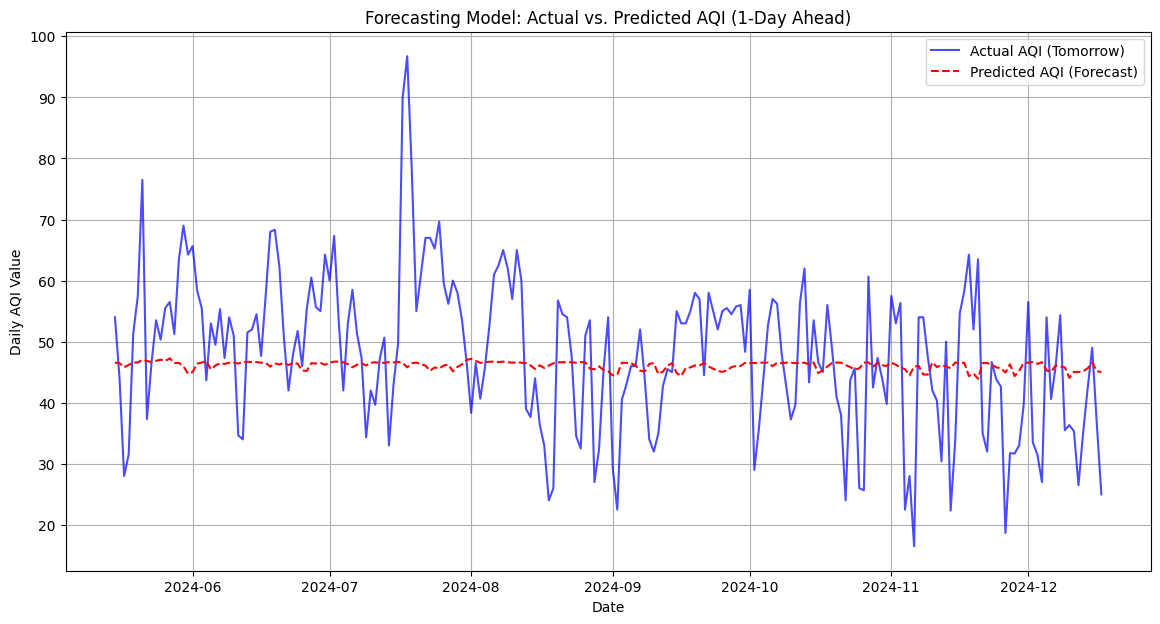

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load and Prepare Data ---

# Load the dataset
file_name = "LAG14_PM_Combined_AQI_2022_2024.csv"
df = pd.read_csv(file_name)

# Convert DATE to datetime and set as index for chronological splitting
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df = df.set_index('DATE').sort_index()

# --- 2. Define Features (X) and Target (y) ---

# Features (Today's data, t)
features = ['Daily_Mean_PM', 'Daily_AQI_Value']
# Target (Tomorrow's data, t+1, which is in this column)
target = 'AQI_Targeted_Value_LAG_14'

X = df[features]
y = df[target]

# Drop any rows where either features or target are missing
# This aligns X and y and removes potential NaNs (e.g., the last row if its target is missing)
combined_df = pd.concat([X, y], axis=1)
combined_df = combined_df.dropna()

X = combined_df[features]
y = combined_df[target]

print(f"Using {len(combined_df)} complete rows for the model.")

# --- 3. Chronological Train/Test Split ---

# We must split by date for a forecasting model. We CANNOT shuffle.
split_point = int(len(combined_df) * 0.8) # 80% train, 20% test

X_train = X.iloc[:split_point]
y_train = y.iloc[:split_point]

X_test = X.iloc[split_point:]
y_test = y.iloc[split_point:]

print(f"Training data from {X_train.index.min().date()} to {X_train.index.max().date()} ({len(X_train)} rows)")
print(f"Test data from {X_test.index.min().date()} to {X_test.index.max().date()} ({len(X_test)} rows)")

# --- 4. Build and Evaluate the Forecasting Model ---

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the forecast
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Forecasting Model Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# --- 5. Get Model Coefficients ---

intercept = model.intercept_
coefficients = model.coef_

print("\n--- Model Coefficients ---")
print(f"Intercept: {intercept:.4f}")
print(f"Coefficient for {features[0]}: {coefficients[0]:.4f}")
print(f"Coefficient for {features[1]}: {coefficients[1]:.4f}")

print("\nModel Formula:")
print(f"Predicted AQI (Tomorrow) = {intercept:.4f} + ({coefficients[0]:.4f} * Daily_Mean_PM) + ({coefficients[1]:.4f} * Daily_AQI_Value)")

# --- 6. Plot the results (Actual vs. Predicted) ---

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual AQI (Tomorrow)', color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred, label='Predicted AQI (Forecast)', color='red', linestyle='--')
plt.title('Forecasting Model: Actual vs. Predicted AQI (1-Day Ahead)')
plt.xlabel('Date')
plt.ylabel('Daily AQI Value')
plt.legend()
plt.grid(True)
# plt.savefig("forecasting_model_results_v2.png")

metrics_data = {
    'Model': ['LAG_14_Model'],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse],
    'R-squared': [r2]
}

# Append dictionary to the list
all_model_metrics.append(metrics_data)

print("\nPlot of forecasting results saved to 'forecasting_model_results_v2.png'")

# Linear Regression Model for LAG 30 (Unscaled)

Using 1064 complete rows for the model.
Training data from 2022-01-01 to 2024-05-01 (851 rows)
Test data from 2024-05-02 to 2024-12-01 (213 rows)

--- Forecasting Model Evaluation Metrics ---
Mean Absolute Error (MAE): 10.2011
Mean Squared Error (MSE): 163.4082
Root Mean Squared Error (RMSE): 12.7831
R-squared (R2): -0.0388

--- Model Coefficients ---
Intercept: 43.8131
Coefficient for Daily_Mean_PM: 0.3335
Coefficient for Daily_AQI_Value: -0.0209

Model Formula:
Predicted AQI (Tomorrow) = 43.8131 + (0.3335 * Daily_Mean_PM) + (-0.0209 * Daily_AQI_Value)

Plot of forecasting results saved to 'forecasting_model_results_v2.png'


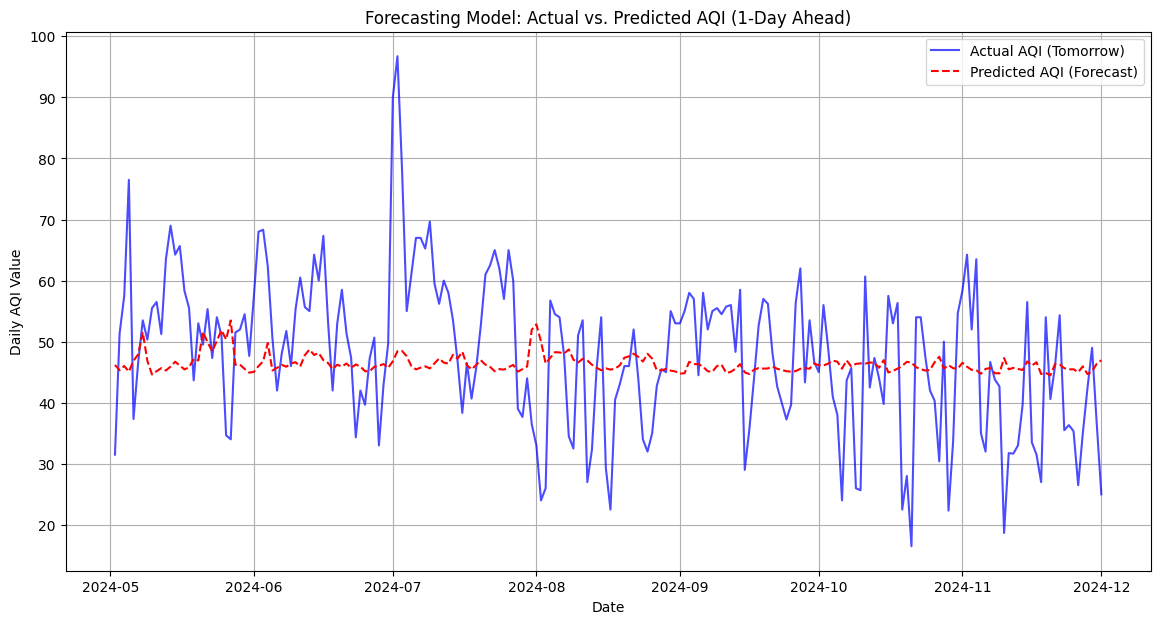

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load and Prepare Data ---

# Load the dataset
file_name = "LAG30_PM_Combined_AQI_2022_2024.csv"
df = pd.read_csv(file_name)

# Convert DATE to datetime and set as index for chronological splitting
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df = df.set_index('DATE').sort_index()

# --- 2. Define Features (X) and Target (y) ---

# Features (Today's data, t)
features = ['Daily_Mean_PM', 'Daily_AQI_Value']
# Target (Tomorrow's data, t+1, which is in this column)
target = 'AQI_Targeted_Value_LAG_30'

X = df[features]
y = df[target]

# Drop any rows where either features or target are missing
# This aligns X and y and removes potential NaNs (e.g., the last row if its target is missing)
combined_df = pd.concat([X, y], axis=1)
combined_df = combined_df.dropna()

X = combined_df[features]
y = combined_df[target]

print(f"Using {len(combined_df)} complete rows for the model.")

# --- 3. Chronological Train/Test Split ---

# We must split by date for a forecasting model. We CANNOT shuffle.
split_point = int(len(combined_df) * 0.8) # 80% train, 20% test

X_train = X.iloc[:split_point]
y_train = y.iloc[:split_point]

X_test = X.iloc[split_point:]
y_test = y.iloc[split_point:]

print(f"Training data from {X_train.index.min().date()} to {X_train.index.max().date()} ({len(X_train)} rows)")
print(f"Test data from {X_test.index.min().date()} to {X_test.index.max().date()} ({len(X_test)} rows)")

# --- 4. Build and Evaluate the Forecasting Model ---

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the forecast
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Forecasting Model Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# --- 5. Get Model Coefficients ---

intercept = model.intercept_
coefficients = model.coef_

print("\n--- Model Coefficients ---")
print(f"Intercept: {intercept:.4f}")
print(f"Coefficient for {features[0]}: {coefficients[0]:.4f}")
print(f"Coefficient for {features[1]}: {coefficients[1]:.4f}")

print("\nModel Formula:")
print(f"Predicted AQI (Tomorrow) = {intercept:.4f} + ({coefficients[0]:.4f} * Daily_Mean_PM) + ({coefficients[1]:.4f} * Daily_AQI_Value)")

# --- 6. Plot the results (Actual vs. Predicted) ---

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual AQI (Tomorrow)', color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred, label='Predicted AQI (Forecast)', color='red', linestyle='--')
plt.title('Forecasting Model: Actual vs. Predicted AQI (1-Day Ahead)')
plt.xlabel('Date')
plt.ylabel('Daily AQI Value')
plt.legend()
plt.grid(True)
# plt.savefig("forecasting_model_results_v2.png")

metrics_data = {
    'Model': ['LAG_30_Model'],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse],
    'R-squared': [r2]
}

# Append dictionary to the list
all_model_metrics.append(metrics_data)

print("\nPlot of forecasting results saved to 'forecasting_model_results_v2.png'")

In [ ]:
# After all models are run, convert the list into a DataFrame
final_metrics_df = pd.DataFrame(all_model_metrics)

# Save the single, complete DataFrame to a file
final_metrics_df.to_csv('all_model_metrics_comparison.csv', index=False)
print("\nFinal metrics saved to 'all_model_metrics_comparison.csv'")

print("\n--- Final Model Comparison DataFrame ---")
final_metrics_df.head()


--- Final Model Comparison DataFrame ---

Final metrics saved to 'all_model_metrics_comparison.csv'


# List for storing all scaled results

In [ ]:
all_model_metrics_scaled = []

# Linear Regression Model for LAG 1 (Scaled)

Using 1093 complete rows for the model.
Training data: 874 rows
Test data: 219 rows

--- Forecasting Model Evaluation Metrics ---
Mean Absolute Error (MAE): 8.2803
Mean Squared Error (MSE): 115.2840
Root Mean Squared Error (RMSE): 10.7370
R-squared (R2): 0.3314

--- Standardized Model Coefficients ---
Note: These coefficients apply to the SCALED data, not raw AQI units.
Intercept (Scaled): 0.0000
Coefficient for Daily_Mean_PM (Std Dev impact): 0.0206
Coefficient for Daily_AQI_Value (Std Dev impact): 0.5368


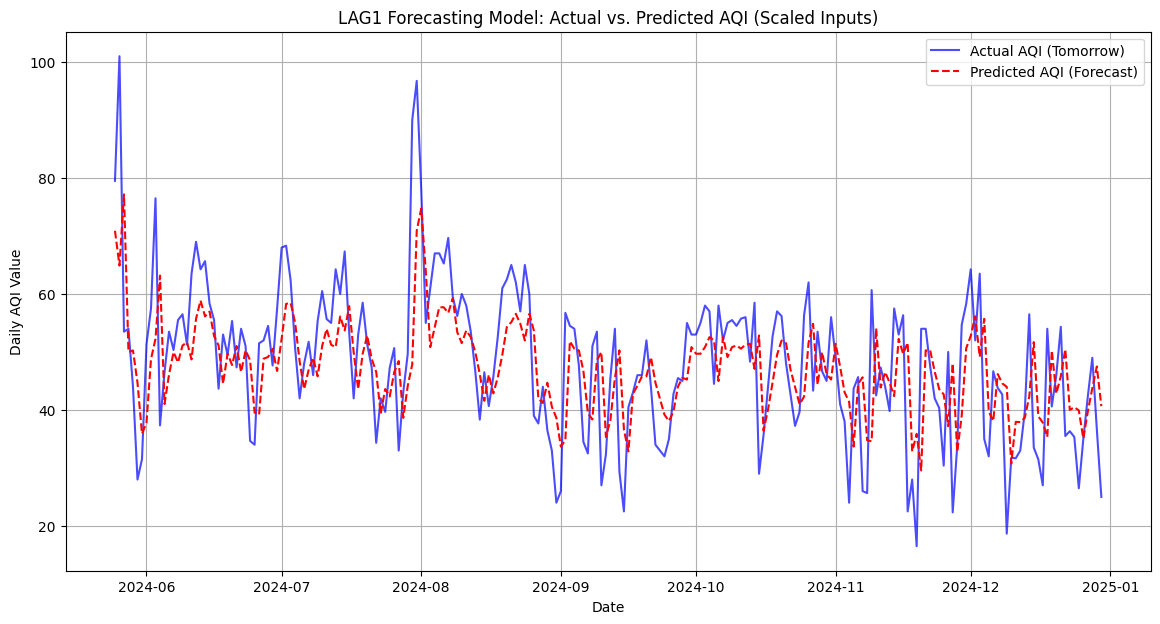


Plot displayed.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler  # <--- 1. Import Scaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Initialize metric list if it doesn't exist
if 'all_model_metrics' not in locals():
    all_model_metrics = []

# --- 1. Load and Prepare Data ---

# Load the dataset
file_name = "LAG1_PM_Combined_AQI_2022_2024.csv"
try:
    df = pd.read_csv(file_name)

    # Convert DATE to datetime
    df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%y', errors='coerce')
    df = df.dropna(subset=['DATE'])
    df = df.set_index('DATE').sort_index()

    # --- 2. Define Features (X) and Target (y) ---

    features = ['Daily_Mean_PM', 'Daily_AQI_Value']
    target = 'AQI_Targeted_Value_LAG_1'

    X = df[features]
    y = df[target]

    combined_df = pd.concat([X, y], axis=1)
    combined_df = combined_df.dropna()

    X = combined_df[features]
    y = combined_df[target]

    print(f"Using {len(combined_df)} complete rows for the model.")

    # --- 3. Chronological Train/Test Split ---

    split_point = int(len(combined_df) * 0.8)

    # Split RAW data first
    X_train_raw = X.iloc[:split_point]
    y_train_raw = y.iloc[:split_point]

    X_test_raw = X.iloc[split_point:]
    y_test_raw = y.iloc[split_point:]

    print(f"Training data: {len(X_train_raw)} rows")
    print(f"Test data: {len(X_test_raw)} rows")

    # --- 4. SCALING (New Section) ---

    # Initialize Scalers
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    # Scale Features (X)
    # Fit ONLY on training data
    X_train_scaled = scaler_X.fit_transform(X_train_raw)
    X_test_scaled = scaler_X.transform(X_test_raw)

    # Scale Target (y)
    # Reshape is required for a single column (Series -> 2D Array)
    y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1))

    # --- 5. Build and Train the Model ---

    model = LinearRegression()

    # Fit on SCALED training data
    model.fit(X_train_scaled, y_train_scaled)

    # --- 6. Make Predictions ---

    # Predict using SCALED test features
    y_pred_scaled = model.predict(X_test_scaled)

    # --- 7. Inverse Transform (Critical Step) ---

    # Convert predicted Z-scores back to AQI values
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    # Flatten to 1D array for metrics comparison
    y_pred = y_pred.flatten()

    # --- 8. Evaluate the Forecast ---

    # Compare actual raw test data vs. inverse-transformed predictions
    mae = mean_absolute_error(y_test_raw, y_pred)
    mse = mean_squared_error(y_test_raw, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_raw, y_pred)

    # Calculate the variance (power) of the true values
    # The mean is calculated implicitly here, you can also use np.var(y_true)
    variance_true = np.mean((y_test_raw - np.mean(y_pred))**2)
    nmse = mse / variance_true

    print("\n--- Forecasting Model Evaluation Metrics ---")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    # --- 9. Get Model Coefficients ---

    intercept = model.intercept_[0]
    coefficients = model.coef_[0]

    print("\n--- Standardized Model Coefficients ---")
    print("Note: These coefficients apply to the SCALED data, not raw AQI units.")
    print(f"Intercept (Scaled): {intercept:.4f}")
    print(f"Coefficient for {features[0]} (Std Dev impact): {coefficients[0]:.4f}")
    print(f"Coefficient for {features[1]} (Std Dev impact): {coefficients[1]:.4f}")

    # --- 10. Plot the results (Actual vs. Predicted) ---

    plt.figure(figsize=(14, 7))
    plt.plot(y_test_raw.index, y_test_raw, label='Actual AQI (Tomorrow)', color='blue', alpha=0.7)
    plt.plot(y_test_raw.index, y_pred, label='Predicted AQI (Forecast)', color='red', linestyle='--')
    plt.title('LAG1 Forecasting Model: Actual vs. Predicted AQI (Scaled Inputs)')
    plt.xlabel('Date')
    plt.ylabel('Daily AQI Value')
    plt.legend()
    plt.grid(True)
    # plt.savefig("lag1_forecast_scaled.png")
    plt.show()

    metrics_data = {
        'Model': 'LAG_1',
        'MAE': mae,
        'NMSE': nmse,
        'RMSE': rmse,
        'R-squared': r2
    }

    all_model_metrics_scaled.append(metrics_data)

    print("\nPlot displayed.")

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")

# Linear Regression Model for LAG 7 (Scaled)

Using 1087 complete rows for the model.
Training data: 869 rows
Test data: 218 rows

--- Forecasting Model Evaluation Metrics ---
Mean Absolute Error (MAE): 10.2013
Mean Squared Error (MSE): 172.6830
Root Mean Squared Error (RMSE): 13.1409
R-squared (R2): -0.0234

--- Model Coefficients (Standardized) ---
Intercept (Scaled): 0.0000
Coefficient for Daily_Mean_PM: 0.0953
Coefficient for Daily_AQI_Value: 0.0206


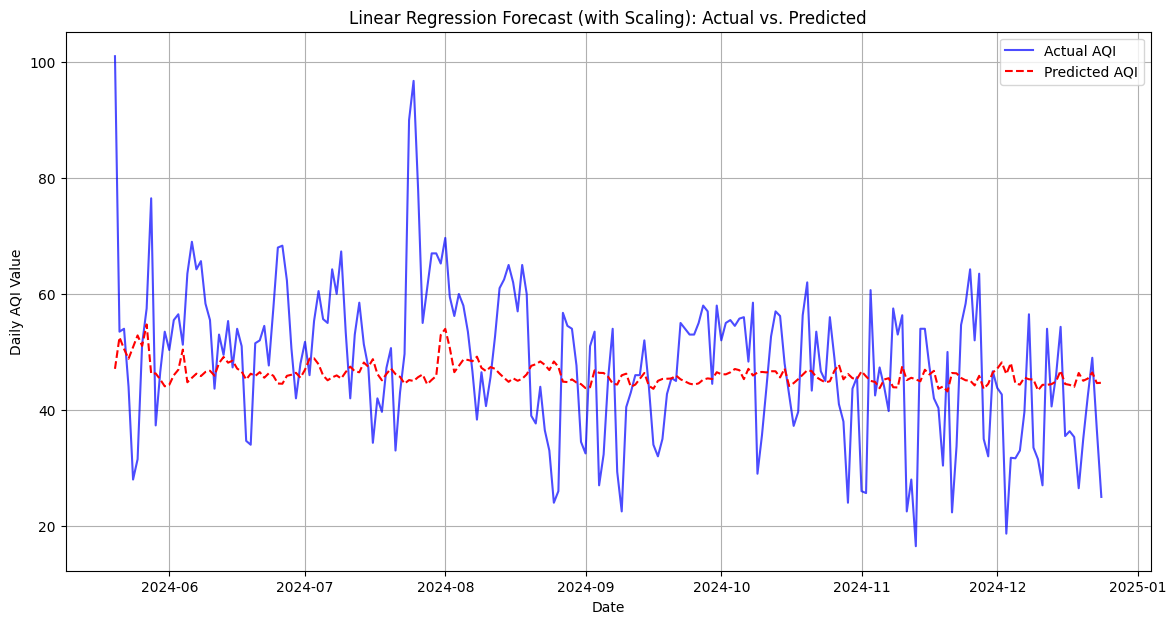

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler  # <--- IMPORT ADDED
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

all_model_metrics = [] # Initializing list if not already present

# --- 1. Load and Prepare Data ---

file_name = "LAG7_PM_Combined_AQI_2022_2024.csv"
try:
    df = pd.read_csv(file_name)

    # Convert DATE to datetime and set as index
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d', errors='coerce')
    df = df.dropna(subset=['DATE'])
    df = df.set_index('DATE').sort_index()

    # --- 2. Define Features (X) and Target (y) ---

    features = ['Daily_Mean_PM', 'Daily_AQI_Value']
    target = 'AQI_Targeted_Value_LAG_7'

    X = df[features]
    y = df[target]

    # Drop missing rows to align data
    combined_df = pd.concat([X, y], axis=1)
    combined_df = combined_df.dropna()

    X = combined_df[features]
    y = combined_df[target]

    print(f"Using {len(combined_df)} complete rows for the model.")

    # --- 3. Chronological Train/Test Split ---

    split_point = int(len(combined_df) * 0.8) # 80% train, 20% test

    # Split raw data first
    X_train_raw = X.iloc[:split_point]
    y_train_raw = y.iloc[:split_point]
    X_test_raw = X.iloc[split_point:]
    y_test_raw = y.iloc[split_point:]

    print(f"Training data: {len(X_train_raw)} rows")
    print(f"Test data: {len(X_test_raw)} rows")

    # --- 4. SCALING (New Section) ---

    # Initialize Scalers
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    # Scale X (Features)
    # Fit only on training data to avoid data leakage
    X_train_scaled = scaler_X.fit_transform(X_train_raw)
    X_test_scaled = scaler_X.transform(X_test_raw) # Apply train scaling to test

    # Scale y (Target)
    # Reshape needed because scaler expects 2D array [[value], [value]]
    y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1))

    # We do NOT necessarily need to scale y_test for the model to predict,
    # but we will transform it if we wanted to calculate loss during training.
    # For evaluation, we will compare against the raw y_test_raw.

    # --- 5. Build and Train the Model ---

    model = LinearRegression()

    # Train using SCALED data
    model.fit(X_train_scaled, y_train_scaled)

    # --- 6. Make Predictions ---

    # Predict using SCALED test features
    y_pred_scaled = model.predict(X_test_scaled)

    # --- 7. Inverse Transform (Critical Step) ---

    # Convert predictions back to original AQI scale
    y_pred_original = scaler_y.inverse_transform(y_pred_scaled)

    # Flatten the array to make it a 1D vector for metrics
    y_pred = y_pred_original.flatten()

    # --- 8. Evaluate the Forecast ---

    # Compare 'y_test_raw' (Actual) vs 'y_pred' (Predicted in original units)
    mae = mean_absolute_error(y_test_raw, y_pred)
    mse = mean_squared_error(y_test_raw, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_raw, y_pred)

    # Calculate the variance (power) of the true values
    # The mean is calculated implicitly here, you can also use np.var(y_true)
    variance_true = np.mean((y_test_raw - np.mean(y_pred))**2)
    nmse = mse / variance_true

    print("\n--- Forecasting Model Evaluation Metrics ---")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    # --- 9. Get Model Coefficients ---

    # Note: These coefficients are for the SCALED data (Standardized Coefficients)
    # They represent importance (std dev change), not literal AQI unit change.
    intercept = model.intercept_[0]
    coefficients = model.coef_[0]

    print("\n--- Model Coefficients (Standardized) ---")
    print(f"Intercept (Scaled): {intercept:.4f}")
    print(f"Coefficient for {features[0]}: {coefficients[0]:.4f}")
    print(f"Coefficient for {features[1]}: {coefficients[1]:.4f}")

    # --- 10. Plot the results ---

    plt.figure(figsize=(14, 7))
    plt.plot(y_test_raw.index, y_test_raw, label='Actual AQI', color='blue', alpha=0.7)
    plt.plot(y_test_raw.index, y_pred, label='Predicted AQI', color='red', linestyle='--')
    plt.title('Linear Regression Forecast (with Scaling): Actual vs. Predicted')
    plt.xlabel('Date')
    plt.ylabel('Daily AQI Value')
    plt.legend()
    plt.grid(True)
    # plt.savefig("linear_regression_scaled.png")
    plt.show()

    metrics_data = {
        'Model': 'LAG_7',
        'MAE': mae,
        'NMSE': nmse,
        'RMSE': rmse,
        'R-squared': r2
    }
    all_model_metrics_scaled.append(metrics_data)

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")

# Linear Regression Model for LAG 14 (Scaled)

Using 1080 complete rows for the model.
Training data: 864 rows
Test data: 216 rows

--- Forecasting Model Evaluation Metrics ---
Mean Absolute Error (MAE): 10.1017
Mean Squared Error (MSE): 158.9820
Root Mean Squared Error (RMSE): 12.6088
R-squared (R2): -0.0113

--- Model Coefficients (Standardized) ---
Intercept (Scaled): -0.0000
Coefficient for Daily_Mean_PM: -0.0524
Coefficient for Daily_AQI_Value: 0.1012


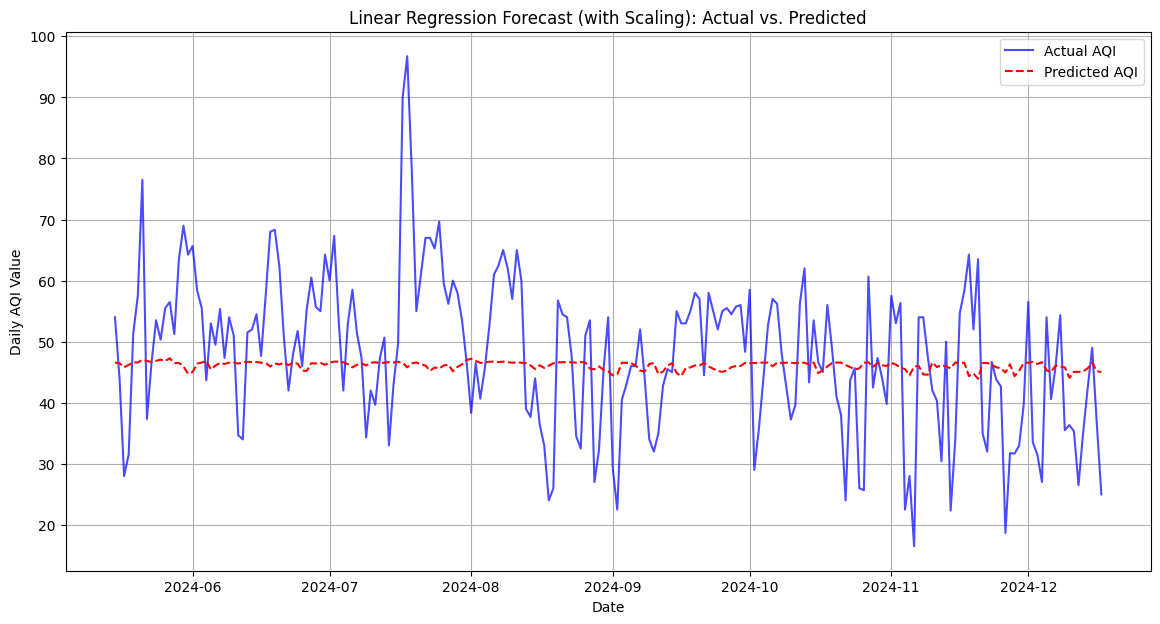

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler  # <--- IMPORT ADDED
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

all_model_metrics = [] # Initializing list if not already present

# --- 1. Load and Prepare Data ---

file_name = "LAG14_PM_Combined_AQI_2022_2024.csv"
try:
    df = pd.read_csv(file_name)

    # Convert DATE to datetime and set as index
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d', errors='coerce')
    df = df.dropna(subset=['DATE'])
    df = df.set_index('DATE').sort_index()

    # --- 2. Define Features (X) and Target (y) ---

    features = ['Daily_Mean_PM', 'Daily_AQI_Value']
    target = 'AQI_Targeted_Value_LAG_14'

    X = df[features]
    y = df[target]

    # Drop missing rows to align data
    combined_df = pd.concat([X, y], axis=1)
    combined_df = combined_df.dropna()

    X = combined_df[features]
    y = combined_df[target]

    print(f"Using {len(combined_df)} complete rows for the model.")

    # --- 3. Chronological Train/Test Split ---

    split_point = int(len(combined_df) * 0.8) # 80% train, 20% test

    # Split raw data first
    X_train_raw = X.iloc[:split_point]
    y_train_raw = y.iloc[:split_point]
    X_test_raw = X.iloc[split_point:]
    y_test_raw = y.iloc[split_point:]

    print(f"Training data: {len(X_train_raw)} rows")
    print(f"Test data: {len(X_test_raw)} rows")

    # --- 4. SCALING (New Section) ---

    # Initialize Scalers
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    # Scale X (Features)
    # Fit only on training data to avoid data leakage
    X_train_scaled = scaler_X.fit_transform(X_train_raw)
    X_test_scaled = scaler_X.transform(X_test_raw) # Apply train scaling to test

    # Scale y (Target)
    # Reshape needed because scaler expects 2D array [[value], [value]]
    y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1))

    # We do NOT necessarily need to scale y_test for the model to predict,
    # but we will transform it if we wanted to calculate loss during training.
    # For evaluation, we will compare against the raw y_test_raw.

    # --- 5. Build and Train the Model ---

    model = LinearRegression()

    # Train using SCALED data
    model.fit(X_train_scaled, y_train_scaled)

    # --- 6. Make Predictions ---

    # Predict using SCALED test features
    y_pred_scaled = model.predict(X_test_scaled)

    # --- 7. Inverse Transform (Critical Step) ---

    # Convert predictions back to original AQI scale
    y_pred_original = scaler_y.inverse_transform(y_pred_scaled)

    # Flatten the array to make it a 1D vector for metrics
    y_pred = y_pred_original.flatten()

    # --- 8. Evaluate the Forecast ---

    # Compare 'y_test_raw' (Actual) vs 'y_pred' (Predicted in original units)
    mae = mean_absolute_error(y_test_raw, y_pred)
    mse = mean_squared_error(y_test_raw, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_raw, y_pred)

    # Calculate the variance (power) of the true values
    # The mean is calculated implicitly here, you can also use np.var(y_true)
    variance_true = np.mean((y_test_raw - np.mean(y_pred))**2)
    nmse = mse / variance_true

    print("\n--- Forecasting Model Evaluation Metrics ---")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    # --- 9. Get Model Coefficients ---

    # Note: These coefficients are for the SCALED data (Standardized Coefficients)
    # They represent importance (std dev change), not literal AQI unit change.
    intercept = model.intercept_[0]
    coefficients = model.coef_[0]

    print("\n--- Model Coefficients (Standardized) ---")
    print(f"Intercept (Scaled): {intercept:.4f}")
    print(f"Coefficient for {features[0]}: {coefficients[0]:.4f}")
    print(f"Coefficient for {features[1]}: {coefficients[1]:.4f}")

    # --- 10. Plot the results ---

    plt.figure(figsize=(14, 7))
    plt.plot(y_test_raw.index, y_test_raw, label='Actual AQI', color='blue', alpha=0.7)
    plt.plot(y_test_raw.index, y_pred, label='Predicted AQI', color='red', linestyle='--')
    plt.title('Linear Regression Forecast (with Scaling): Actual vs. Predicted')
    plt.xlabel('Date')
    plt.ylabel('Daily AQI Value')
    plt.legend()
    plt.grid(True)
    # plt.savefig("linear_regression_scaled.png")
    plt.show()

    metrics_data = {
        'Model': 'LAG_14',
        'MAE': mae,
        'NMSE': nmse,
        'RMSE': rmse,
        'R-squared': r2
    }
    all_model_metrics_scaled.append(metrics_data)

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")

# Linear Regression Model for LAG 30 (Scaled)

Using 1064 complete rows for the model.
Training data: 851 rows
Test data: 213 rows

--- Forecasting Model Evaluation Metrics ---
Mean Absolute Error (MAE): 10.2011
Mean Squared Error (MSE): 163.4082
Root Mean Squared Error (RMSE): 12.7831
R-squared (R2): -0.0388

--- Model Coefficients (Standardized) ---
Intercept (Scaled): -0.0000
Coefficient for Daily_Mean_PM: 0.1044
Coefficient for Daily_AQI_Value: -0.0205


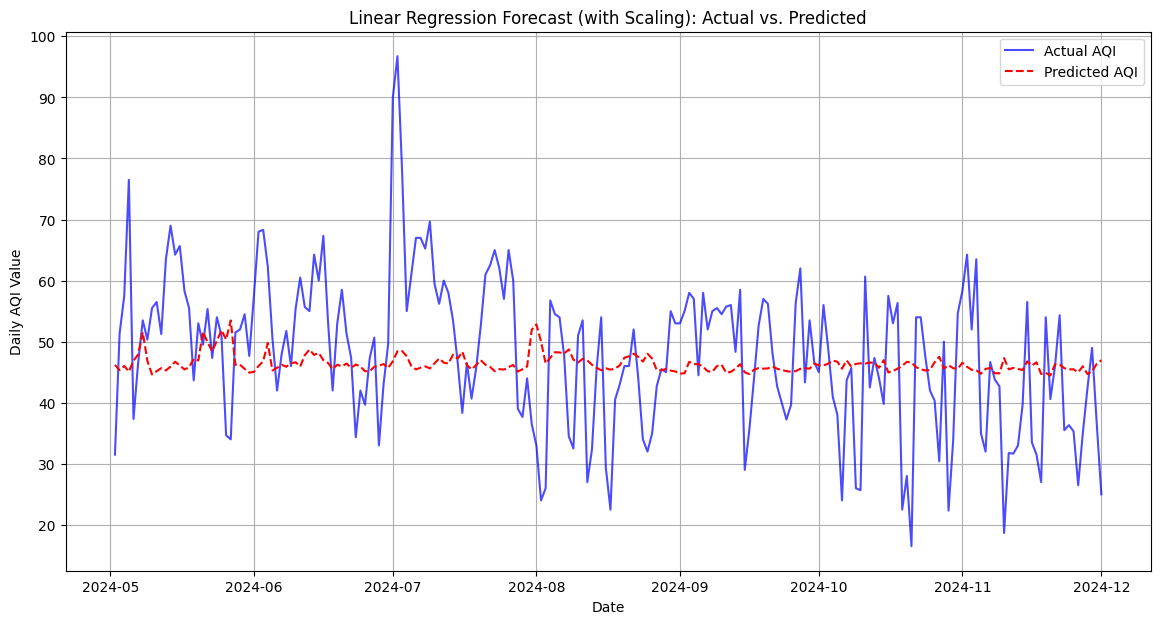

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler  # <--- IMPORT ADDED
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

all_model_metrics = [] # Initializing list if not already present

# --- 1. Load and Prepare Data ---

file_name = "LAG30_PM_Combined_AQI_2022_2024.csv"
try:
    df = pd.read_csv(file_name)

    # Convert DATE to datetime and set as index
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d', errors='coerce')
    df = df.dropna(subset=['DATE'])
    df = df.set_index('DATE').sort_index()

    # --- 2. Define Features (X) and Target (y) ---

    features = ['Daily_Mean_PM', 'Daily_AQI_Value']
    target = 'AQI_Targeted_Value_LAG_30'

    X = df[features]
    y = df[target]

    # Drop missing rows to align data
    combined_df = pd.concat([X, y], axis=1)
    combined_df = combined_df.dropna()

    X = combined_df[features]
    y = combined_df[target]

    print(f"Using {len(combined_df)} complete rows for the model.")

    # --- 3. Chronological Train/Test Split ---

    split_point = int(len(combined_df) * 0.8) # 80% train, 20% test

    # Split raw data first
    X_train_raw = X.iloc[:split_point]
    y_train_raw = y.iloc[:split_point]
    X_test_raw = X.iloc[split_point:]
    y_test_raw = y.iloc[split_point:]

    print(f"Training data: {len(X_train_raw)} rows")
    print(f"Test data: {len(X_test_raw)} rows")

    # --- 4. SCALING (New Section) ---

    # Initialize Scalers
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    # Scale X (Features)
    # Fit only on training data to avoid data leakage
    X_train_scaled = scaler_X.fit_transform(X_train_raw)
    X_test_scaled = scaler_X.transform(X_test_raw) # Apply train scaling to test

    # Scale y (Target)
    # Reshape needed because scaler expects 2D array [[value], [value]]
    y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1))

    # We do NOT necessarily need to scale y_test for the model to predict,
    # but we will transform it if we wanted to calculate loss during training.
    # For evaluation, we will compare against the raw y_test_raw.

    # --- 5. Build and Train the Model ---

    model = LinearRegression()

    # Train using SCALED data
    model.fit(X_train_scaled, y_train_scaled)

    # --- 6. Make Predictions ---

    # Predict using SCALED test features
    y_pred_scaled = model.predict(X_test_scaled)

    # --- 7. Inverse Transform (Critical Step) ---

    # Convert predictions back to original AQI scale
    y_pred_original = scaler_y.inverse_transform(y_pred_scaled)

    # Flatten the array to make it a 1D vector for metrics
    y_pred = y_pred_original.flatten()

    # --- 8. Evaluate the Forecast ---

    # Compare 'y_test_raw' (Actual) vs 'y_pred' (Predicted in original units)
    mae = mean_absolute_error(y_test_raw, y_pred)
    mse = mean_squared_error(y_test_raw, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_raw, y_pred)

    print("\n--- Forecasting Model Evaluation Metrics ---")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    # --- 9. Get Model Coefficients ---

    # Note: These coefficients are for the SCALED data (Standardized Coefficients)
    # They represent importance (std dev change), not literal AQI unit change.
    intercept = model.intercept_[0]
    coefficients = model.coef_[0]

    print("\n--- Model Coefficients (Standardized) ---")
    print(f"Intercept (Scaled): {intercept:.4f}")
    print(f"Coefficient for {features[0]}: {coefficients[0]:.4f}")
    print(f"Coefficient for {features[1]}: {coefficients[1]:.4f}")

    # Calculate the variance (power) of the true values
    # The mean is calculated implicitly here, you can also use np.var(y_true)
    variance_true = np.mean((y_test_raw - np.mean(y_pred))**2)
    nmse = mse / variance_true

    # --- 10. Plot the results ---

    plt.figure(figsize=(14, 7))
    plt.plot(y_test_raw.index, y_test_raw, label='Actual AQI', color='blue', alpha=0.7)
    plt.plot(y_test_raw.index, y_pred, label='Predicted AQI', color='red', linestyle='--')
    plt.title('Linear Regression Forecast (with Scaling): Actual vs. Predicted')
    plt.xlabel('Date')
    plt.ylabel('Daily AQI Value')
    plt.legend()
    plt.grid(True)
    # plt.savefig("linear_regression_scaled.png")
    plt.show()

    metrics_data = {
        'Model': 'LAG_30',
        'MAE': mae,
        'NMSE': nmse,
        'RMSE': rmse,
        'R-squared': r2
    }
    all_model_metrics_scaled.append(metrics_data)

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")

In [ ]:
# After all models are run, convert the list into a DataFrame
final_metrics_df = pd.DataFrame(all_model_metrics_scaled)

# Save the single, complete DataFrame to a file
# final_metrics_df.to_csv('all_model_metrics_comparison.csv', index=False)
# print("\nFinal metrics saved to 'all_model_metrics_comparison.csv'")

print("\n--- Final Model Comparison DataFrame ---")
final_metrics_df.head()


--- Final Model Comparison DataFrame ---


,Model,MAE,NMSE,RMSE,R-squared
0,LAG_1,8.280347,0.664673,10.737038,0.331364
1,LAG_7,10.201286,0.998641,13.140890,-0.023356
2,LAG_14,10.101695,0.989482,12.608807,-0.011272
3,LAG_30,10.201110,1.020794,12.783122,-0.038818


Data Prepared: Predicting 30 days ahead.
Rows after removing NaNs: 1061

--- Results for 30-Day Forecast ---
MAE:  17.7215
RMSE: 25.5043
R2:   0.0026
NMSE: 0.9892


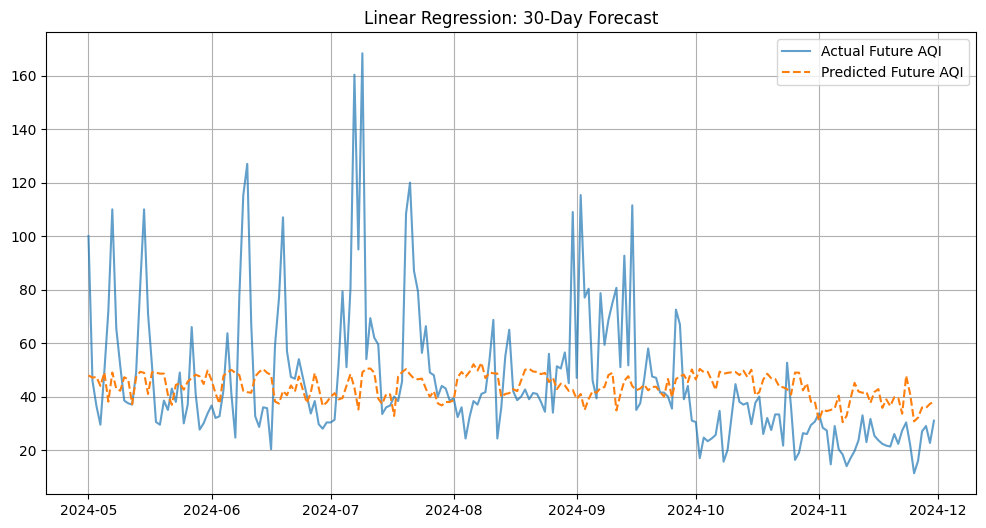

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# --- Configuration ---
# You only need to change this number to experiment with different lags!
FORECAST_HORIZON = 30
file_name = "Ozone_combined_aqi_2022-2024.csv" # Use your main raw data file here

# --- 1. Load and Optimize Data Preparation ---

# Assuming you have a file with just the raw daily data
# If you don't have a raw file, use your existing one but ignore the pre-made lag columns
try:
    df = pd.read_csv(file_name)
    df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y', errors='coerce')
    df = df.dropna(subset=['DATE']).set_index('DATE').sort_index()

    # --- 2. Dynamic Feature & Target Engineering (The Optimization) ---

    # Base Features (Current Day's Data)
    feature_cols = ['Daily_Mean_PM', 'Daily_AQI_Value']

    # Create the Target: "What will the AQI be in X days?"
    # shift(-30) pulls the value from 30 days in the future back to the current row
    target_col = f'AQI_Forecast_{FORECAST_HORIZON}d'
    df[target_col] = df['Daily_AQI_Value'].shift(-FORECAST_HORIZON)

    # (Optional) Add Lagged Features: "What was the AQI yesterday?"
    # df['AQI_Yesterday'] = df['Daily_AQI_Value'].shift(1)
    # feature_cols.append('AQI_Yesterday')

    # Drop the rows at the very end where we don't know the future yet (NaNs)
    df_clean = df[feature_cols + [target_col]].dropna()

    print(f"Data Prepared: Predicting {FORECAST_HORIZON} days ahead.")
    print(f"Rows after removing NaNs: {len(df_clean)}")

    X = df_clean[feature_cols]
    y = df_clean[target_col]

    # --- 3. Split (Chronological) ---

    split_point = int(len(df_clean) * 0.8)

    X_train = X.iloc[:split_point]
    y_train = y.iloc[:split_point]
    X_test = X.iloc[split_point:]
    y_test = y.iloc[split_point:]

    # --- 4. Scaling (Standard Pipeline) ---

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    # Reshape y for the scaler
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

    # --- 5. Model Training ---

    model = LinearRegression()
    model.fit(X_train_scaled, y_train_scaled)

    # --- 6. Prediction & Evaluation ---

    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate the variance (power) of the true values
    # The mean is calculated implicitly here, you can also use np.var(y_true)
    variance_true = np.mean((y_test - np.mean(y_pred))**2)
    nmse = mse / variance_true

    print(f"\n--- Results for {FORECAST_HORIZON}-Day Forecast ---")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2:   {r2:.4f}")
    print(f"NMSE: {nmse:.4f}")

    # --- 7. Plotting ---

    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual Future AQI', alpha=0.7)
    plt.plot(y_test.index, y_pred, label='Predicted Future AQI', linestyle='--')
    plt.title(f'Linear Regression: {FORECAST_HORIZON}-Day Forecast')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
df_clean.head()

,Daily_Mean_PM,Daily_AQI_Value,AQI_Forecast_1d
DATE,,,
2022-01-01,0.025000,23.000000,30.333333
2022-01-02,0.032333,30.333333,27.666667
2022-01-03,0.029667,27.666667,33.333333
2022-01-04,0.036000,33.333333,30.666667
2022-01-05,0.033000,30.666667,23.000000
